### There are two sheets in the following data file. Each sheet contains data regarding the rank, rating and trend etc from two different agencies. The data in two sheets are not exactly same but somehow supplement to each other. Analyze the data, separately and try to extract the information hidden.
<ins>For example:</ins>

1. How the ranks of programming language are correlated to each other in two different dataset? 
2. First sheet have 28 languages while second sheet have 20 programming languages. On the basis of the correlation among the two sheets, can we predict the rank of language which is not listed in second sheet and vice versa? 
3. On the basis of trend data, which language has better scope and worst and what will be the market share in next two year? 
4. On the basis of rank change and other information, can you predict that which language will be at first rank in year 2021? 



In [35]:
# Importing neccessary packages
library(dplyr) 
library(readxl)
options(scipen=999) 

In [36]:
# importing datasets
xlsx_file_sh1 <- read_excel('R_assignment3_data.xlsx',sheet=1)
xlsx_file_sh2 <- read_excel('R_assignment3_data.xlsx',sheet=2)

In [37]:
## TODO 
temp_df = xlsx_file_sh2

In [38]:
head(xlsx_file_sh1)
head(xlsx_file_sh2)

Rank,Language,Share,Trend
<dbl>,<chr>,<chr>,<chr>
1,Python,31.56 %,2.8999999999999998E-2
2,Java,16.4 %,-3.1 %
3,Javascript,8.38 %,3.0000000000000001E-3
4,C#,6.5 %,-8.0000000000000002E-3
5,PHP,5.85 %,-0.5 %
6,C/C++,5.8 %,0


44075,43709,Programming Language,Ratings,Change
<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,2,C,0.1595,0.0074
2,1,Java,0.1348,-0.0318
3,3,Python,0.1047,0.0059
4,4,C++,0.0711,0.0148
5,5,C#,0.0458,0.0118
6,6,Visual Basic,0.0412,0.0083


In [39]:
# Function to remove % symbol from the given string.
remove_percentage <- function(val){
    return(gsub("%", "", val))
}

In [40]:
xlsx_file_sh1 <- xlsx_file_sh1 %>% 
                 mutate(Trend = as.numeric(lapply(Trend, remove_percentage)), 
                        Share = as.numeric(lapply(Share, remove_percentage)))

In [41]:
# DataFrame after removing the '%''
head(xlsx_file_sh1)

Rank,Language,Share,Trend
<dbl>,<chr>,<dbl>,<dbl>
1,Python,31.56,0.029
2,Java,16.40,-3.100
3,Javascript,8.38,0.003
4,C#,6.50,-0.008
5,PHP,5.85,-0.500
6,C/C++,5.80,0.000


In [42]:
names(xlsx_file_sh2)

[1] "44075"                "43709"                "Programming Language"
[4] "Ratings"              "Change"

In [43]:
# Droping ranking columns from sheet 2 dataset
xlsx_file_sh2 <- xlsx_file_sh2[ , !(names(xlsx_file_sh2) %in% c('43709', '44075'))]
xlsx_file_sh1 <- xlsx_file_sh1[ , !(names(xlsx_file_sh1) %in% c('Rank'))]

In [44]:
head(xlsx_file_sh1, 3)
head(xlsx_file_sh2, 3)

Language,Share,Trend
<chr>,<dbl>,<dbl>
Python,31.56,0.029
Java,16.40,-3.100
Javascript,8.38,0.003


Programming Language,Ratings,Change
<chr>,<dbl>,<dbl>
C,0.1595,0.0074
Java,0.1348,-0.0318
Python,0.1047,0.0059


In [45]:
0.1047/sum(xlsx_file_sh2$Ratings)

[1] 0.1374376

In [46]:
31.56/sum(xlsx_file_sh1$Share)

[1] 0.3217808

### Combining both datasets into one on th basis of assumptions and domain understanding:
1. Trend and Change seems to be the same thing. We will combine both, for lang having both Trend and Change we will take arithmetic means and keep same if only one is present.
2. Share and Rating signifies popularity amongst developer. So will combine this using the similar aproach as in Trend-Change.
3. And drop rank column since rank is decided based on popularity itself.


In [47]:
cat(':: Sheet 1 Languages ::')
xlsx_file_sh1$Language
cat('-------------------------------------------------------------------\n')
cat(':: Sheet 2 Languages ::')
xlsx_file_sh2$`Programming Language`
cat('-------------------------------------------------------------------\n')
cat(':: Sheet (1+2) Languages ::')
sort(union(xlsx_file_sh1$Language, xlsx_file_sh2$`Programming Language`))

:: Sheet 1 Languages ::

[1] "Python"       "Java"         "Javascript"   "C#"           "PHP"         
 [6] "C/C++"        "R"            "Objective-C"  "Swift"        "TypeScript"  
[11] "Matlab"       "Kotlin"       "Go"           "Ruby"         "VBA"         
[16] "Rust"         "Scala"        "Visual Basic" "Lua"          "Dart"        
[21] "Ada"          "Perl"         "Groovy"       "Julia"        "Cobol"       
[26] "Abap"         "Delphi"       "Haskell"

-------------------------------------------------------------------
:: Sheet 2 Languages ::

[1] "C"                 "Java"              "Python"           
 [4] "C++"               "C#"                "Visual Basic"     
 [7] "JavaScript"        "PHP"               "R"                
[10] "SQL"               "Go"                "Swift"            
[13] "Perl"              "Assembly language" "Ruby"             
[16] "MATLAB"            "Groovy"            "Rust"             
[19] "Objective-C"       "Dart"

-------------------------------------------------------------------
:: Sheet (1+2) Languages ::

[1] "Abap"              "Ada"               "Assembly language"
 [4] "C"                 "C/C++"             "C#"               
 [7] "C++"               "Cobol"             "Dart"             
[10] "Delphi"            "Go"                "Groovy"           
[13] "Haskell"           "Java"              "Javascript"       
[16] "JavaScript"        "Julia"             "Kotlin"           
[19] "Lua"               "Matlab"            "MATLAB"           
[22] "Objective-C"       "Perl"              "PHP"              
[25] "Python"            "R"                 "Ruby"             
[28] "Rust"              "Scala"             "SQL"              
[31] "Swift"             "TypeScript"        "VBA"              
[34] "Visual Basic"

### Here we see that:
1. Javascript and Matlab will have duplicate entries if we merge-add both. So we will updated the names.
2. Also in sheet 2 we see C and C++ we see two different entries. By domain knowledge we know C++ is a superset language of C.</br>So we will merge these two rows together to one row.

In [48]:
xlsx_file_sh2$`Programming Language`[16] = 'Matlab'
xlsx_file_sh2$`Programming Language`[7] = 'Javascript'

xlsx_file_sh2$`Programming Language`[1] = 'C/C++'
xlsx_file_sh2$Ratings[1] = mean(c(xlsx_file_sh2$Ratings[1], xlsx_file_sh2$Ratings[4]))
xlsx_file_sh2$Change[1] = mean(c(xlsx_file_sh2$Change[1], xlsx_file_sh2$Change[4]))

# Droping C++ row
xlsx_file_sh2 <- xlsx_file_sh2[-c(4), ]

In [49]:
xlsx_file_sh2 <- xlsx_file_sh2[order(-xlsx_file_sh2$Ratings),]

In [50]:
all_langs = union(xlsx_file_sh1$Language, xlsx_file_sh2$`Programming Language`)
trend = c()
popularity = c()

In [51]:
length(all_langs)

[1] 30

In [56]:
# Acculmulating trend = (Trend+Change) & popularity = (Ratings+Change)

sum_rating <- sum(xlsx_file_sh1$Share)
sum_share <- sum(xlsx_file_sh2$Ratings)
sum_trend <- sum(xlsx_file_sh1$Trend)
sum_change <- sum(xlsx_file_sh2$Change)

for(i in 1:length(all_langs)) {
    if(all_langs[i] %in% xlsx_file_sh1$Language & all_langs[i] %in% xlsx_file_sh2$`Programming Language`){
        shar = xlsx_file_sh1$Share[xlsx_file_sh1$Language==all_langs[i]]/sum_share
        rate = xlsx_file_sh2$Ratings[xlsx_file_sh2$`Programming Language`==all_langs[i]]/sum_rating
        popularity[i] <- mean(c(rate, shar))
        
        tren = xlsx_file_sh1$Trend[xlsx_file_sh1$Language==all_langs[i]]/sum_trend
        chan = xlsx_file_sh2$Change[xlsx_file_sh2$`Programming Language`==all_langs[i]]/sum_change
        trend[i] <- mean(c(tren, chan))
        
    }else if(all_langs[i] %in% xlsx_file_sh1$Language){
        popularity[i] <- xlsx_file_sh1$Share[xlsx_file_sh1$Language==all_langs[i]]/sum_share
        trend[i] <- xlsx_file_sh1$Trend[xlsx_file_sh1$Language==all_langs[i]]/sum_trend
        
    }else{
        popularity[i] <- xlsx_file_sh2$Ratings[xlsx_file_sh2$`Programming Language`==all_langs[i]]/sum_rating
        trend[i] <- xlsx_file_sh2$Change[xlsx_file_sh2$`Programming Language`==all_langs[i]]/sum_change
    }
}

In [97]:
trend <- round(trend, digits = 3)*100
popularity <- round(popularity, digits = 3)

In [99]:
combine_df <- data.frame(all_langs, popularity, trend)
combine_df <- combine_df[order(-combine_df$popularity),]
# combine_df

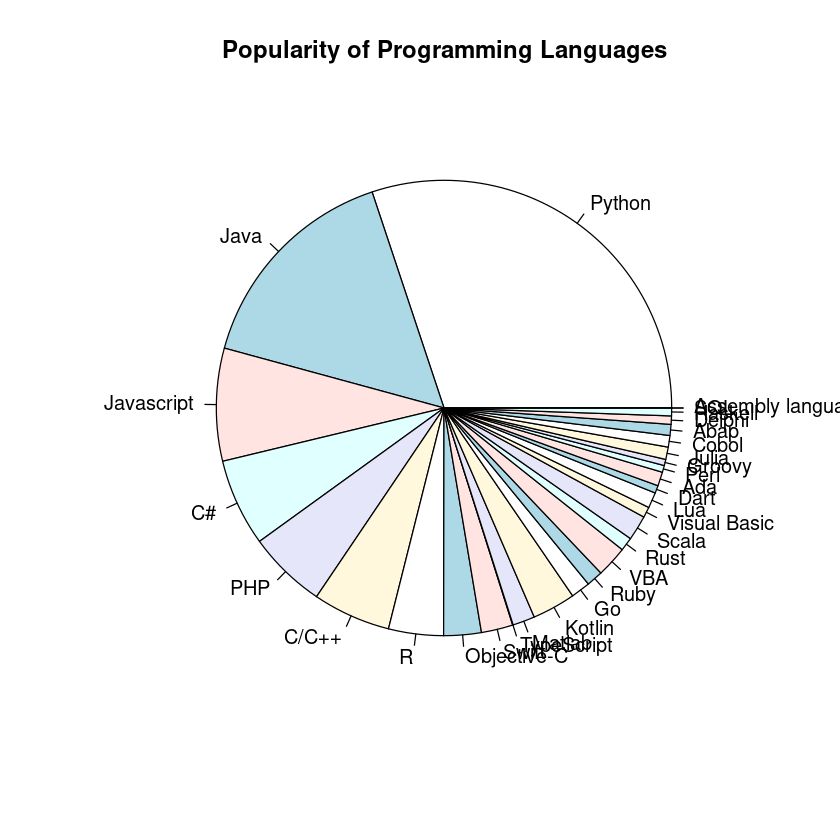

In [100]:
pie(popularity, all_langs, main='Popularity of Programming Languages')

In [101]:
categorizer <- function(val){
                    if(val>0){
                        return('positive')
                    }else if(val<0){
                        return('negative')
                    }else{
                        return('stable')
                    }
                }

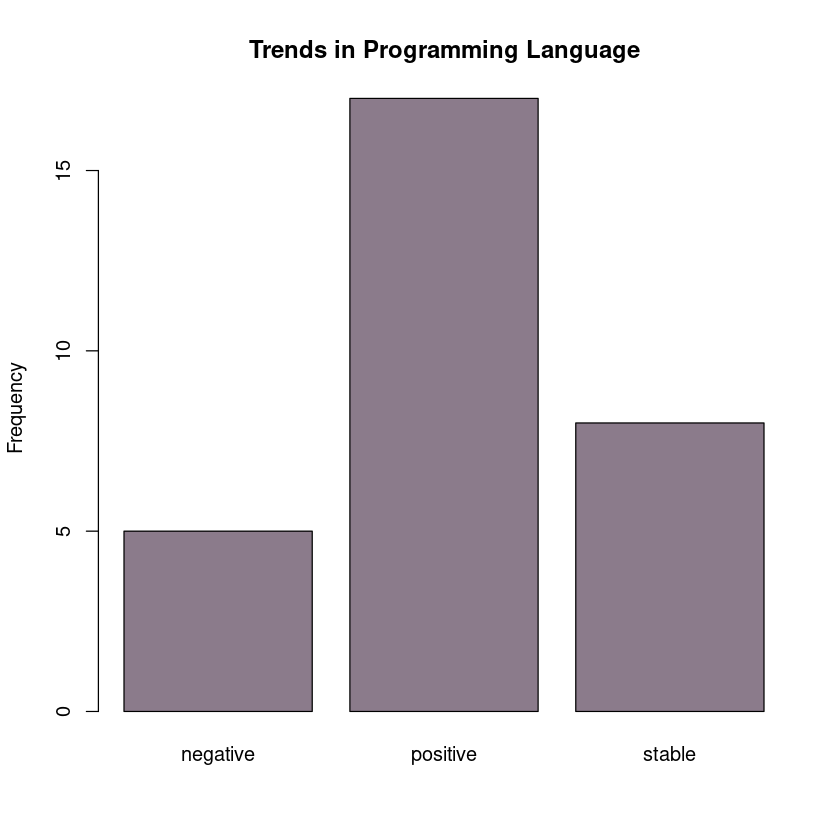

In [102]:
barplot(table(unlist(lapply(combine_df$trend, categorizer))),
        ylab='Frequency', main='Trends in Programming Language', col='thistle4')

In [103]:
language_with_neg_trend = subset(combine_df, trend<0)
language_with_pos_trend = subset(combine_df, trend>0)
language_with_stable_trend = subset(combine_df, trend==0)

In [104]:
language_with_stable_trend

,all_langs,popularity,trend
,<chr>,<dbl>,<dbl>
12,Kotlin,2.490,0
19,Lua,0.897,0
21,Ada,0.804,0
24,Julia,0.712,0
25,Cobol,0.665,0
27,Delphi,0.480,0
28,Haskell,0.449,0
10,TypeScript,0.030,0


In [105]:
language_with_pos_trend[order(-language_with_pos_trend$trend),]

,all_langs,popularity,trend
,<chr>,<dbl>,<dbl>
7,R,3.156,25.2
4,C#,5.027,22.4
6,C/C++,4.486,21.0
18,Visual Basic,0.611,17.9
5,PHP,4.524,17.1
1,Python,24.409,10.9
16,Rust,0.781,10.4
3,Javascript,6.481,7.7
9,Swift,1.817,6.4


In [106]:
language_with_neg_trend[order(language_with_neg_trend$trend),]

,all_langs,popularity,trend
,<chr>,<dbl>,<dbl>
2,Java,12.684,-26.9
8,Objective-C,2.158,-18.8
23,Groovy,0.356,-9.8
29,SQL,0.000,-7.2
30,Assembly language,0.000,-3.0


# Report

#### From the various data processing and analysis we have done on the given datasets of programming languages. We can come to following conclusions:
1. **Python** is the most popular language followed by **Java** and **Javascript**. These top 3 languages covers more than 50% of the market share.
2. Even though **Java** is the 2nd most popular language its popularity is steepily plumetting followed by **Objective-C** and **Groovy**.
3. Only a minuscule percentage of developer even care to use **Assembly Language**.
4. **R** is the most trending language closely followed by **C#** and **C/C++**